#In Vehicle Coupon Recommendation Exploratory Data Analysis

* data source: http://archive.ics.uci.edu/ml/datasets/in-vehicle+coupon+recommendation

__*Feature Information:*__

* destination: No Urgent Place, Home, Work
* passanger: Alone, Friend(s), Kid(s), Partner (who are the passengers in the car)
weather: Sunny, Rainy, Snowy
* temperature:55, 80, 30
* time: 2PM, 10AM, 6PM, 7AM, 10PM
* coupon: Restaurant(<$\$20$), Coffee House, Carry out & Take away, Bar, Restaur($\$20-\$50$)

* expiration: 1d, 2h (the coupon expires in 1 day or in 2 hours)
* gender: Female, Male
* age: 21, 46, 26, 31, 41, 50plus, 36, below21
* maritalStatus: Unmarried partner, Single, Married partner, Divorced, Widowed
* has_Children:1, 0
* education: Some college - no degree, Bachelors degree, Associates degree, High School Graduate, Graduate degree (Masters or Doctorate), Some High School
* occupation: Unemployed, Architecture & Engineering, Student,
Education&Training&Library, Healthcare Support,
Healthcare Practitioners & Technical, Sales & Related, Management,
Arts Design Entertainment Sports & Media, Computer & Mathematical,
Life Physical Social Science, Personal Care & Service,
Community & Social Services, Office & Administrative Support,
Construction & Extraction, Legal, Retired,
Installation Maintenance & Repair, Transportation & Material Moving,
Business & Financial, Protective Service,
Food Preparation & Serving Related, Production Occupations,
Building & Grounds Cleaning & Maintenance, Farming Fishing & Forestry
* income:$ \$37500 - \$49999, \$62500 - \$74999, \$12500 - \$24999, \$75000 - \$87499,
\$50000 - \$62499, \$25000 - \$37499, \$100000 or More, \$87500 - \$99999, Less than \$12500$
* Bar: never, less1, 1-3, gt8, nan4-8 (feature meaning: how many times do you go to a bar every month?)
* CoffeeHouse: never, less1, 4-8, 1-3, gt8, nan (feature meaning: how many times do you go to a coffeehouse every month?)
* CarryAway:n4-8, 1-3, gt8, less1, never (feature meaning: how many times do you get take-away food every month?)
* RestaurantLessThan20: 4-8, 1-3, less1, gt8, never (feature meaning: how many times do you go to a restaurant with an average expense per person of less than $20 every month?)

* Restaurant20To50: 1-3, less1, never, gt8, 4~8, nan (feature meaning: how many times do you go to a restaurant with average expense per person of $20-$50 every month?)
* toCoupon_GEQ15min: 0,1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 15 minutes)
* toCoupon_GEQ25min: 0, 1 (feature meaning: driving distance to the restaurant/bar for using the coupon is greater than 25 minutes)
* direction_same: 0, 1 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* direction_opp: 1, 0 (feature meaning: whether the restaurant/bar is in the same direction as your current destination)
* Y: 1, 0 (whether the coupon is accepted)



## Import the useful library and lading the cleaned data

In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Springboard/subunit7/data/coupon_data.csv')

In [4]:
data.head()

,Unnamed: 0,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,22,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
1,23,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0
2,24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,1
3,25,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,1,0,0,1,0
4,26,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Male,21,Single,0,Bachelors degree,Architecture & Engineering,$62500 - $74999,never,less1,4~8,4~8,less1,1,0,0,0,1,0


* Looks like all features are category. 

In [5]:
# reomve the first columns(Unnamed: 0), the id of the original data
data = data.iloc[:,1:]
data.shape

(12007, 25)

##Exploratory Data Analysis

### Pair Plot

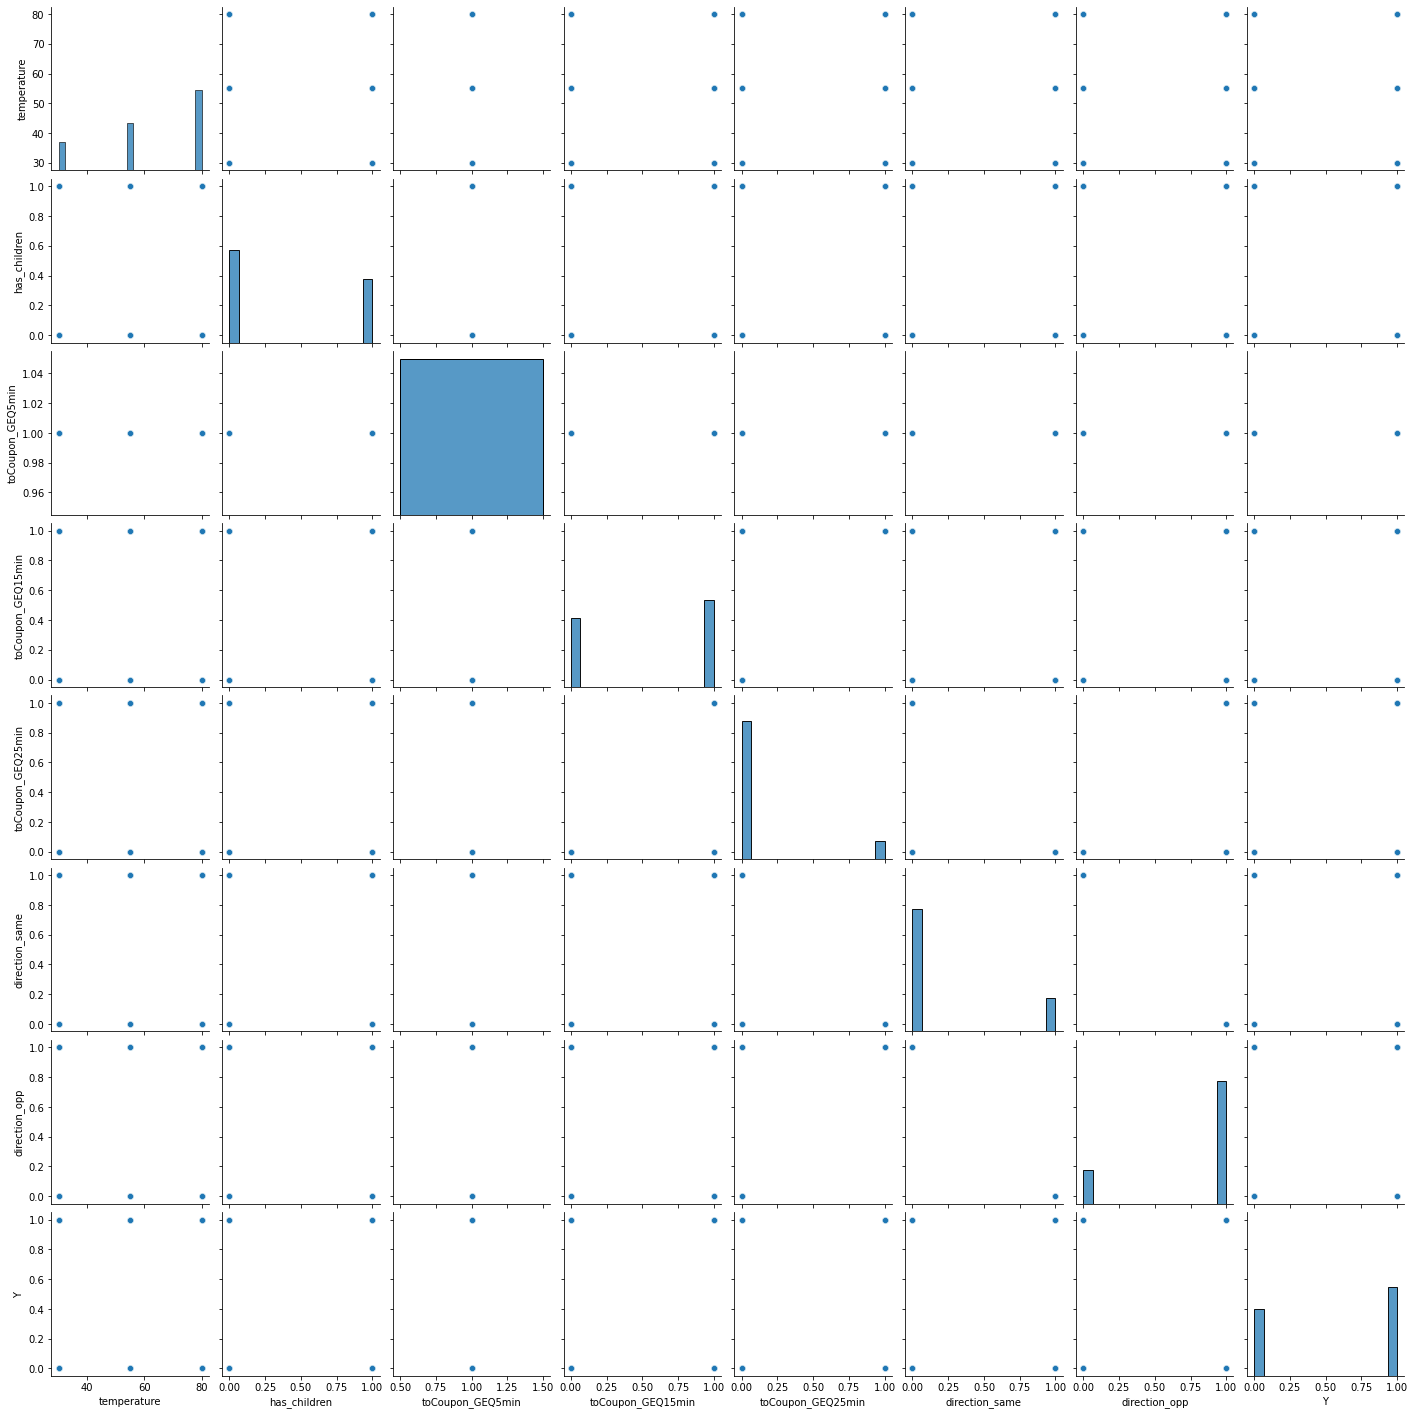

In [ ]:
sns.pairplot(data)

* Can not get much information using the pairplot.

### Let's see the Distribution of each category feature.

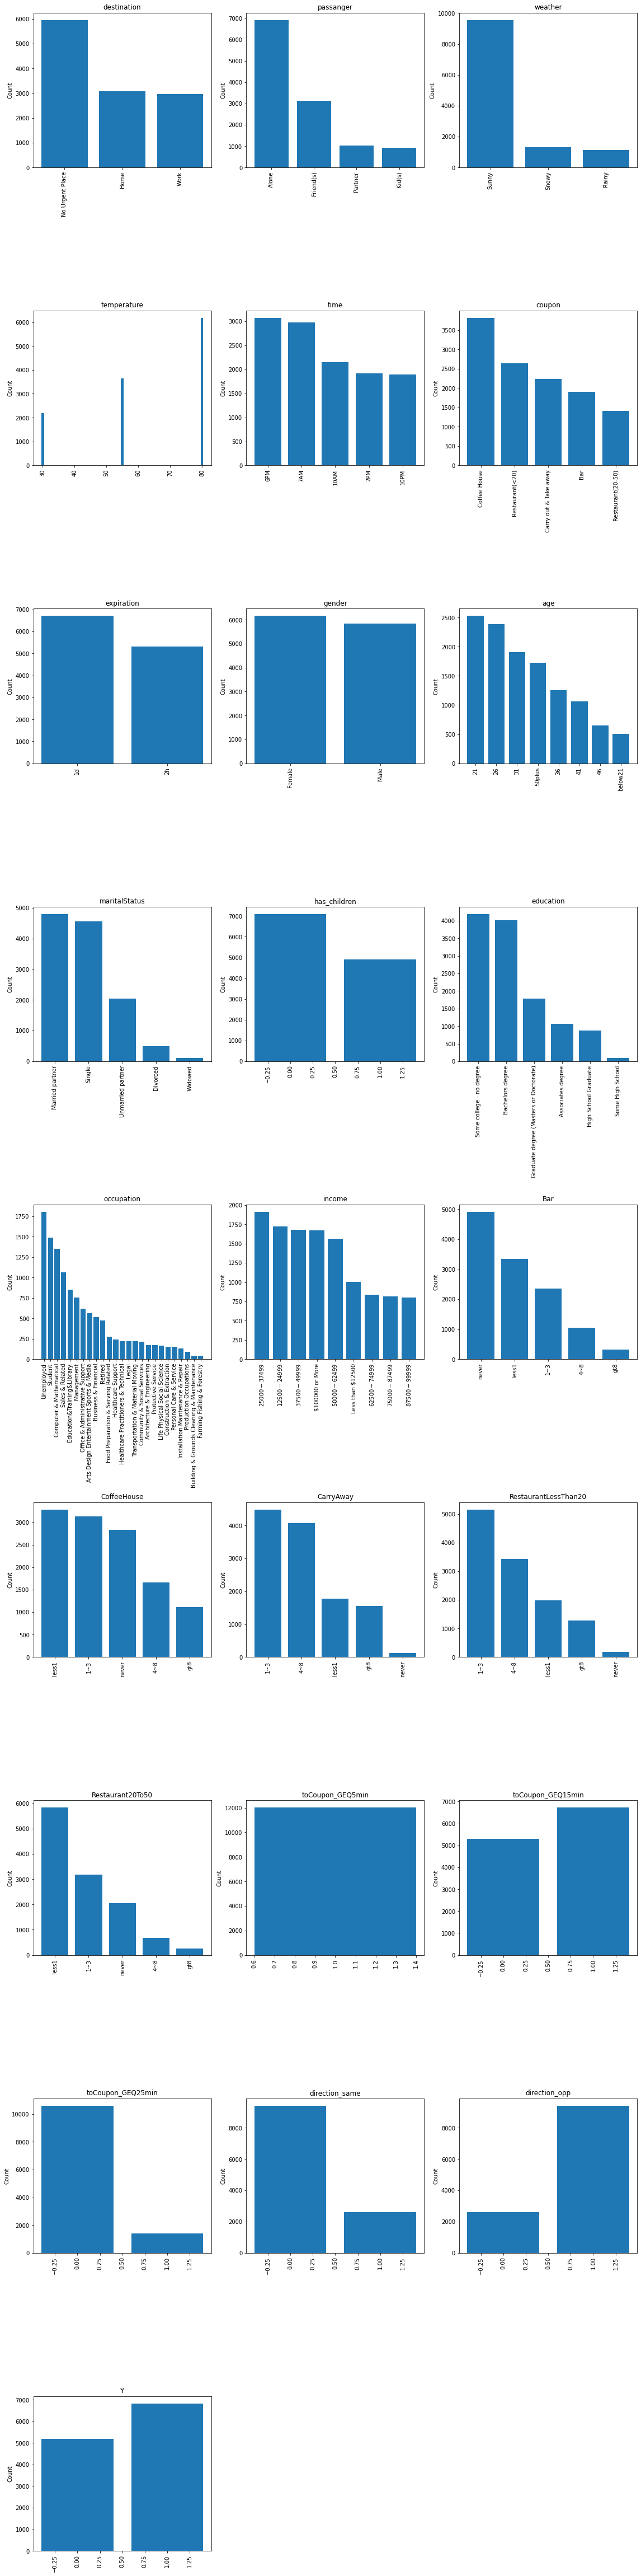

In [82]:
rows = 9
cols = 3

plt.figure(figsize=(16, 64)) 
for i in range(1,data.shape[1]+1):
  ax = plt.subplot(rows, cols, i)
  feature = data.iloc[:,[i-1]].value_counts()
  name = [j[0] for j in list(feature.index)]
  ax.bar(name, feature.values)
  plt.xticks(rotation='vertical')
  plt.title(data.columns[i-1])
  plt.ylabel('Count')

plt.tight_layout(pad=1.0)
plt.show()

*According to the histogram from above:*
* The columns direction_same and direction_opp are the same feature, one of them shoule be drop
* The feature toCoupon_GEQ5min are all the same category, shoule drop this column
* The label Y is not extreme unbalance，we can use the accuracy as the metric of the prediction in the future.

In [85]:
data = data.loc[:,data.columns!='direction_opp']

In [88]:
data = data.loc[:,data.columns!='toCoupon_GEQ5min']

In [89]:
data.shape

(12007, 23)

In [90]:
data.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'Bar', 'CoffeeHouse', 'CarryAway',
       'RestaurantLessThan20', 'Restaurant20To50', 'toCoupon_GEQ15min',
       'toCoupon_GEQ25min', 'direction_same', 'Y'],
      dtype='object')

In [92]:
#Save the data
data.to_csv('/content/drive/MyDrive/Springboard/subunit7/data/coupon_data1.csv')